<a href="https://colab.research.google.com/github/yveslevi/Template_M1/blob/main/notebooks/Notebooks%2520sprint%25204/colab_Hiperpar%C3%A2metros_modelos_novo_cliente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas e autenticação

In [ ]:
!pip install -U -q PyDrive

In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelBinarizer
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#autenticação email inteli
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#dowload base de dados
downloaded = drive.CreateFile({'id': '1-EL5jV5m_7zJi-rKgDXMAcCSrTGkq7z2'})
downloaded.GetContentFile('not_client.csv')
downloaded = drive.CreateFile({'id': '1-C4iOW6z7oAtWCHhwuC-IeTxp8COwbxj'})
downloaded.GetContentFile('client.csv')

In [ ]:
# Dados lidos do arquvio csv
not_client = pd.read_csv('not_client.csv')
client = pd.read_csv('client.csv')

#Comparação de features em relação ao indice de novo cliente


In [ ]:
##Aqui nós iremos gerar uma matriz que indica a porcentagem de correlação entre os atributos
matriz_corr = not_client.corr().style.background_gradient(cmap='coolwarm')
matriz_corr

,Unnamed: 0,vlr_credito,num_atend_atrs,vlr_score,num_atend,qtd_reclm,qtd_restr,vlr_renda,ind_novo_cli
Unnamed: 0,1.000000,-0.004607,0.005030,-0.003689,0.001298,0.000004,-0.002301,-0.000855,-0.005114
vlr_credito,-0.004607,1.000000,-0.000654,0.094079,-0.001340,0.002196,0.114967,0.474466,0.028897
num_atend_atrs,0.005030,-0.000654,1.000000,0.007907,0.537946,-0.000046,-0.000860,0.000204,0.004194
vlr_score,-0.003689,0.094079,0.007907,1.000000,0.003653,-0.002278,-0.103882,0.145935,0.618704
num_atend,0.001298,-0.001340,0.537946,0.003653,1.000000,-0.000088,-0.000059,0.001665,-0.001255
qtd_reclm,0.000004,0.002196,-0.000046,-0.002278,-0.000088,1.000000,0.005118,-0.001529,-0.002539
qtd_restr,-0.002301,0.114967,-0.000860,-0.103882,-0.000059,0.005118,1.000000,0.089440,-0.316344
vlr_renda,-0.000855,0.474466,0.000204,0.145935,0.001665,-0.001529,0.089440,1.000000,0.065169
ind_novo_cli,-0.005114,0.028897,0.004194,0.618704,-0.001255,-0.002539,-0.316344,0.065169,1.000000


In [ ]:
##Aqui nós iremos listar as melhores correlação para a nossa resposta de engajado ou não

target_corr = matriz_corr.data.ind_novo_cli
df_corr = target_corr.abs().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm')
df_corr

,ind_novo_cli
ind_novo_cli,1.000000
vlr_score,0.618704
qtd_restr,0.316344
vlr_renda,0.065169
vlr_credito,0.028897
Unnamed: 0,0.005114
num_atend_atrs,0.004194
qtd_reclm,0.002539
num_atend,0.001255


#Testagem de hiperparâmetros manualmente nos modelos Novo cliente











##Treinamento Teste

In [ ]:
from sklearn.model_selection import train_test_split

cols = ['vlr_credito', 'vlr_renda', 'qtd_restr','vlr_score']

# Dividindo x e y
x = not_client[cols]
y = not_client['ind_novo_cli']

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 50)

In [ ]:
not_client[cols].head()

,vlr_credito,vlr_renda,qtd_restr,vlr_score
0,0.000100,0.002846,0.00000,1.607560
1,0.000000,0.020181,0.00463,-0.876154
2,0.000220,0.001294,0.00463,-0.778900
3,0.000565,0.016300,0.00000,2.198564
4,0.000000,0.004916,0.00000,-1.003332


##Árvore de decisão Parâmetro 1

In [ ]:
#treinando o modelo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

avd = DecisionTreeClassifier(criterion='entropy', random_state=42)
avd.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
#predizendo valores
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([0., 0., 0., ..., 0., 0., 0.])

###Métricas

Acurácia

In [ ]:
#acurácia das predições
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_avd)

1.0

Precisão

In [ ]:
#precisão das predições
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_avd)

1.0

Recall

In [ ]:
#recall das predições
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_avd)

1.0

###Matriz de confusão

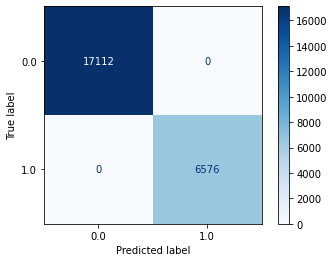

In [ ]:
#visualização dos erros e acertos da predição
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')


##Árvore de decisão Parâmetro 2

In [ ]:
#treinamento do modelo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

avd = DecisionTreeClassifier(criterion='gini', random_state=42)
avd.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#predição do modelo
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([0., 0., 0., ..., 0., 0., 0.])

###Métricas

Acurácia

In [ ]:
#acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_avd)

1.0

Precisão

In [ ]:
#precisão do modelo
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_avd)

1.0


Recall

In [ ]:
#recall do modelo
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_avd)

1.0

###Matriz de confusão

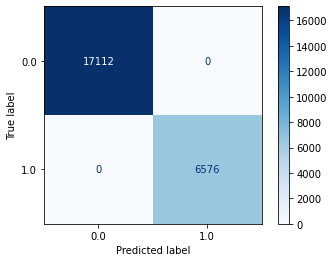

In [ ]:
#visualização dos erros e acertos da predição
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')


##Árvore de decisão Parâmetro 3

In [ ]:
#treinamento do modelo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

avd = DecisionTreeClassifier(criterion='entropy', max_features='auto', random_state=42)
avd.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=42)

In [ ]:
#predição do modelo
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([0., 0., 0., ..., 0., 0., 0.])

###Métricas

Acurácia

In [ ]:
#acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_avd)

1.0

Precisão

In [ ]:
#precisão do modelo
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_avd)

1.0

Recall

In [ ]:
#recall do modelo
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_avd)

1.0

###Matriz de confusão

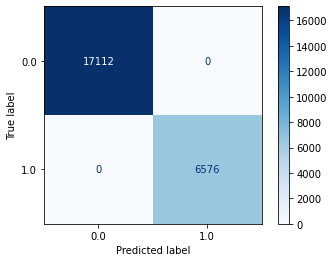

In [ ]:
#visualização dos erros e acertos da predição
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')


##Árvore de decisão Parâmetro 4

In [ ]:
#treinamento do  modelo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

avd = DecisionTreeClassifier(criterion='entropy',max_features='log2', random_state=42)
avd.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       random_state=42)

In [ ]:
#predição do modelo
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([0., 0., 0., ..., 0., 0., 0.])

###Métricas

Acurácia

In [ ]:
#acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_avd)

1.0

Precisão

In [ ]:
#predição do modelo
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_avd)

1.0

Recall

In [ ]:
#recall do modelo
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_avd)

1.0

###Matriz de confusão

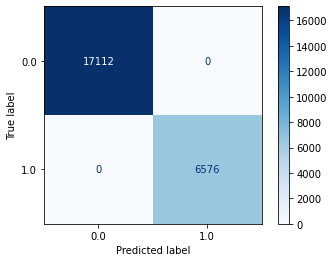

In [ ]:
#visualização dos erros e acertos da predição
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')


##Árvore de decisão Parâmetro 5

In [ ]:
#treinamento do modelo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

avd = DecisionTreeClassifier(criterion='entropy',max_features='sqrt', random_state=42)
avd.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=42)

In [ ]:
#prediçaõ do modelo
y_pred_avd = avd.predict(x_test)
y_pred_avd

array([0., 0., 0., ..., 0., 0., 0.])

###Métricas

Acurácia

In [ ]:
#acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_avd)

1.0

Precisão

In [ ]:
#predição do modelo
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_avd)

1.0

Recall

In [ ]:
#recall do modelo
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_avd)

1.0

###Matriz de confusão

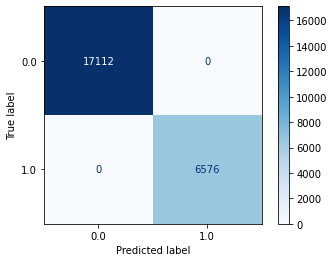

In [ ]:
#visualização dos erros e acertos da predição
plot_confusion_matrix(avd,x_test,y_test, cmap='Blues')


###De acordo com os parâmetros utilizados, todos os resultados analisados foram iguais, pois há um vazamento de dados a partir do vlr_score.
#### 

##Random Forest Parâmetro 1


In [ ]:
#treinamento do modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

rdf = RandomForestClassifier(criterion='entropy',max_features='sqrt', random_state=42)
rdf.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       random_state=42)

In [ ]:
#predição do modelo
y_pred_rdf = rdf.predict(x_test)

###Métricas

Acurácia

In [ ]:
#acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rdf)

1.0

Precisão

In [ ]:
#predição do modelo
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rdf)

1.0

Recall

In [ ]:
#recall do modelo
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rdf)

1.0

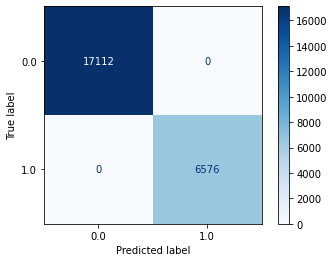

In [ ]:
#visualização dos erros e acertos da predição
plot_confusion_matrix(rdf,x_test,y_test, cmap='Blues')

##Random Forest Parâmetro 2


In [ ]:
#treinamento do modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

rdf = RandomForestClassifier(criterion='gini', random_state=42)
rdf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
#predição do modelo
y_pred_rdf = rdf.predict(x_test)

###Métricas

Acurácia

In [ ]:
#acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rdf)

1.0

Precisão

In [ ]:
#precisão do modelo
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rdf)

1.0

Recall

In [ ]:
#recall do modelo
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rdf)

1.0

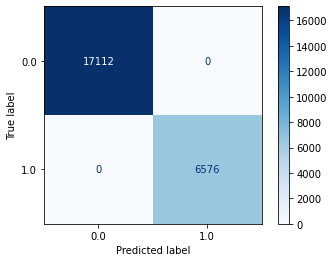

In [ ]:
#visualização dos erros e acertos da predição
plot_confusion_matrix(rdf,x_test,y_test, cmap='Blues')

##Random Forest Parâmetro 3


In [ ]:
#treinamento do modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

rdf = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=42)
rdf.fit(x_train, y_train)



RandomForestClassifier(criterion='entropy', random_state=42)

In [ ]:
#predição do modelo
y_pred_rdf = rdf.predict(x_test)

###Métricas

Acurácia

In [ ]:
#acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rdf)

1.0

Precisão

In [ ]:
#precisão do modelo
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rdf)

1.0

Recall

In [ ]:
#recall do modelo
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rdf)

1.0

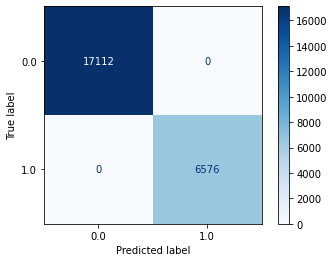

In [ ]:
#visualização dos erros e acertos da predição
plot_confusion_matrix(rdf,x_test,y_test, cmap='Blues')

##Random Forest Parâmetro 4


In [ ]:
#treinamento do modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

rdf = RandomForestClassifier(criterion='entropy', max_features='sqrt', random_state=42)
rdf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       random_state=42)

In [ ]:
#predição do modelo
y_pred_rdf = rdf.predict(x_test)

###Métricas

Acurácia

In [ ]:
#acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rdf)

1.0

Precisão

In [ ]:
#precisão do modelo
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rdf)

1.0

Recall

In [ ]:
#recall do modelo
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rdf)

1.0

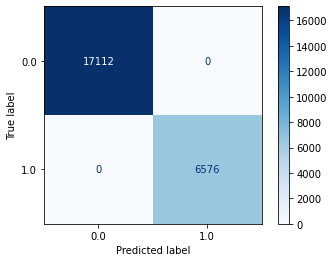

In [ ]:
#visualização dos erros e acertos da predição
plot_confusion_matrix(rdf,x_test,y_test, cmap='Blues')

##Random Forest Parâmetro 5


In [ ]:
#treinamento do modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

rdf = RandomForestClassifier(criterion='entropy', max_features='log2', random_state=42)
rdf.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_features='log2',
                       random_state=42)

In [ ]:
#predição do modelo
y_pred_rdf = rdf.predict(x_test)

###Métricas

Acurácia

In [ ]:
#acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rdf)

1.0

Precisão

In [ ]:
#precisão do modelo
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rdf)

1.0

Recall

In [ ]:
#recall do modelo
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rdf)

1.0

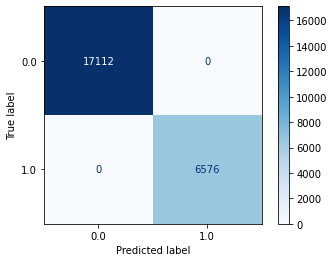

In [ ]:
#visualização dos erros e acertos da predição
plot_confusion_matrix(rdf,x_test,y_test, cmap='Blues')

In [ ]:
from sklearn.linear_model import LogisticRegression
rgl = LogisticRegression().fit(x_train, y_train)

In [ ]:
y_pred_rgl = rgl.predict(x_test)

###Métricas

Acuracia

In [ ]:
#acurácia do modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rgl)

0.8453647416413373

Precisão

In [ ]:
#precisão do modelo
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_rgl)

0.769273433166944

Recall

In [ ]:
#recall do modelo
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_rgl)

0.6327554744525548

###Matriz de confusão

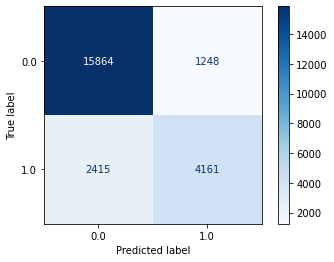

In [ ]:
#visualização dos erros e acertos da predição
plot_confusion_matrix(rgl,x_test,y_test, cmap='Blues')

#GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

##Random Forest

In [ ]:
# Definir o espaço possível dos hiperparametros a serem testados no modelo
parametros = {'n_estimators': [10, 20, 40, 60, 80, 100],
              'criterion': ['gini', 'entropy','log loss'],
              'max_depth': [10,20,30,40,50],}

rdf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid=parametros)
grid_search.fit(x_train, y_train.squeeze())

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log loss'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'n_estimators': [10, 20, 40, 60, 80, 100]})

In [ ]:
#mostrar os melhores parâmetros
print(grid_search.best_score_)
print(grid_search.best_params_)

1.0
{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 10}


In [ ]:
#armazenar as métricas do modelo
rdf_best = grid_search.best_estimator_
rdf_best

RandomForestClassifier(max_depth=10, n_estimators=10)

In [ ]:
#mostrar as métricas do teste do modelo
y_pred = rdf_best.predict(x_test)
print('Acc treino: ', rdf_best.score(x_train, y_train ))
print('Acc teste: ', rdf_best.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))

Acc treino:  1.0
Acc teste:  1.0
Revocação:  1.0
Precisão:  1.0


## ÁRVORE DE DECISÃO

In [ ]:
# Definir o espaço possível dos hiperparametros a serem testados no modelo
parametros = { 'splitter': ['best', 'random'],
              'criterion': ['gini', 'entropy','log loss'],
              'max_depth': [10,20,30,40,50],}


grid_search = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_train, y_train.squeeze())

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log loss'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'splitter': ['best', 'random']})

In [ ]:
#mostrar os melhores parâmetros
print(grid_search.best_score_)
print(grid_search.best_params_)

1.0
{'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}


In [ ]:
#armazenar as métricas do modelo
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=10)

In [ ]:
#mostrar as métricas do teste do modelo
y_pred = dt_best.predict(x_test)
print('Acc treino: ', dt_best.score(x_train, y_train ))
print('Acc teste: ', dt_best.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))

Acc treino:  1.0
Acc teste:  1.0
Revocação:  1.0
Precisão:  1.0


#RandomSearch

##Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Definir o espaço possível dos hiperparametros a serem testados no modelo
parametros = {'n_estimators': [10, 20, 40, 60, 80, 100],
              'criterion': ['gini', 'entropy','log loss'],
              'max_depth': [10,20,30,40,50],}

random_search = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions=parametros)
random_search.fit(x_train, y_train.squeeze())

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log loss'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'n_estimators': [10, 20, 40, 60, 80,
                                                         100]})

In [ ]:
#mostrar os melhores parametros
print(random_search.best_score_)
print(random_search.best_params_)

1.0
{'n_estimators': 60, 'max_depth': 50, 'criterion': 'gini'}


In [ ]:
#armazenar as métricas do modelo
rdf_best = random_search.best_estimator_
rdf_best

RandomForestClassifier(max_depth=50, n_estimators=60)

In [ ]:
#mostrar as métricas do teste do modelo
y_pred = rdf_best.predict(x_test)
print('Acc treino: ', rdf_best.score(x_train, y_train ))
print('Acc teste: ', rdf_best.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))

Acc treino:  1.0
Acc teste:  1.0
Revocação:  1.0
Precisão:  1.0


##Árvore de decisão

In [ ]:
# Definir o espaço possível dos hiperparametros a serem testados no modelo
parametros = { 'splitter': ['best', 'random'],
              'criterion': ['gini', 'entropy','log loss'],
              'max_depth': [10,20,30,40,50],}


random_search = RandomizedSearchCV(estimator = DecisionTreeClassifier(), param_distributions=parametros)
random_search.fit(x_train, y_train.squeeze())

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log loss'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'splitter': ['best', 'random']})

In [ ]:
#mostrar os melhores parametros
print(random_search.best_score_)
print(random_search.best_params_)

1.0
{'splitter': 'best', 'max_depth': 20, 'criterion': 'gini'}


In [ ]:
#armazenar as métricas do modelo
dt_best = random_search.best_estimator_

In [ ]:
#mostrar as métricas do modelo
y_pred = dt_best.predict(x_test)
print('Acc treino: ', dt_best.score(x_train, y_train ))
print('Acc teste: ', dt_best.score(x_test, y_test.squeeze() ))
print( 'Revocação: ', recall_score( y_test, y_pred ))
print( 'Precisão: ', precision_score( y_test, y_pred ))

Acc treino:  1.0
Acc teste:  1.0
Revocação:  1.0
Precisão:  1.0
